## Community Population Survey Analysis

## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cps = pd.read_csv('../../data/cps.csv')
cps.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,HFLAG,ASECWTH,GQTYPE,HHINTYPE,CPI99,...,UHRSWORKLY,FULLPART,FTOTVAL,INCTOT,INCWAGE,INCBUS,INCFARM,INCRENT,INCEDUC,INCLONGJ
0,2008,1,3,20071202814500,1,NaN,528.38,1.0,1,0.804,...,40,1,142162,53106,48000,0,0,0,0,40000
1,2008,1,3,20071202814500,1,NaN,528.38,1.0,1,0.804,...,55,1,142162,89056,84000,0,0,0,0,82000
2,2008,3,3,20071202862500,1,NaN,293.90,1.0,1,0.804,...,40,1,90141,36651,33100,0,0,0,3000,32500
3,2008,3,3,20071202862500,1,NaN,293.90,1.0,1,0.804,...,40,1,90141,53490,46900,4100,0,0,0,46900
4,2008,3,3,20071202862500,1,NaN,293.90,1.0,1,0.804,...,999,0,90141,999999999,99999999,99999999,99999999,9999999,999999,99999999


# Preprocessing

In [3]:
cols = ["YEAR", "SERIAL", "MONTH", "CPSID", "HHINTYPE", "CPI99", "REGION", 
        "STATEFIP", "METRO", "HHINCOME", "PROPTAX", "PUBHOUS", "ATELUNCH", "FAMINC",
        "PERNUM", "CPSIDP", "AGE", "RACE", "MARST", "POPSTAT", "EMPSTAT", "OCC2010",
        "CLASSWKR", "UHRSWORKT", "EDUC", "WORKLY", "WKSWORK1", "UHRSWORKLY", "FULLPART",
        ]
min_year = 2014

In [4]:
cps_cleaned = cps[cols]
cps_cleaned = cps_cleaned[cps_cleaned["YEAR"] >= min_year]
cps_cleaned.head()

,YEAR,SERIAL,MONTH,CPSID,HHINTYPE,CPI99,REGION,STATEFIP,METRO,HHINCOME,...,POPSTAT,EMPSTAT,OCC2010,CLASSWKR,UHRSWORKT,EDUC,WORKLY,WKSWORK1,UHRSWORKLY,FULLPART
1233142,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,430,27,40,124,2,52,45,1
1233143,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,420,21,45,111,2,52,45,1
1233144,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,2010,21,40,111,2,52,40,1
1233145,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,3,0,9999,0,999,1,0,0,999,0
1233146,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,3,0,9999,0,999,1,0,0,999,0


In [6]:
cps_cleaned['YEAR'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [14]:
cps_cleaned[cps_cleaned["CPSID"] == 20140102878600]

,YEAR,SERIAL,MONTH,CPSID,HHINTYPE,CPI99,REGION,STATEFIP,METRO,HHINCOME,...,POPSTAT,EMPSTAT,OCC2010,CLASSWKR,UHRSWORKT,EDUC,WORKLY,WKSWORK1,UHRSWORKLY,FULLPART
1233142,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,430,27,40,124,2,52,45,1
1233143,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,420,21,45,111,2,52,45,1
1233144,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,1,10,2010,21,40,111,2,52,40,1
1233145,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,3,0,9999,0,999,1,0,0,999,0
1233146,2014,1,3,20140102878600,1,0.715,11,23,1,207803,...,3,0,9999,0,999,1,0,0,999,0
1432737,2015,23,3,20140102878600,1,0.704,11,23,1,149242,...,1,10,430,27,997,124,2,52,40,1
1432738,2015,23,3,20140102878600,1,0.704,11,23,1,149242,...,1,10,5000,21,50,111,2,52,40,1


In [7]:
cps_cleaned.shape

(1604400, 29)

In [16]:
cps_cleaned.describe()

,YEAR,SERIAL,MONTH,CPSID,HHINTYPE,CPI99,REGION,STATEFIP,METRO,HHINCOME,...,POPSTAT,EMPSTAT,OCC2010,CLASSWKR,UHRSWORKT,EDUC,WORKLY,WKSWORK1,UHRSWORKLY,FULLPART
count,1.604400e+06,1.604400e+06,1604400.0,1.604400e+06,1604400.0,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,...,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06,1.604400e+06
mean,2.017779e+03,4.857188e+04,3.0,1.309210e+13,1.0,6.770895e-01,2.940840e+01,2.767376e+01,2.516417e+00,1.000823e+05,...,1.441461e+00,1.529853e+01,7.130219e+03,1.037738e+01,5.871314e+02,6.577649e+01,1.279711e+00,2.332689e+01,5.200816e+02,5.973386e-01
std,2.565660e+00,2.745838e+04,0.0,9.627223e+12,0.0,3.071084e-02,1.035884e+01,1.629806e+01,9.956063e-01,1.105378e+05,...,8.273922e-01,1.323911e+01,3.459000e+03,1.083914e+01,4.750214e+02,4.109743e+01,7.996734e-01,2.484260e+01,4.802246e+02,6.616461e-01
min,2.014000e+03,1.000000e+00,3.0,0.000000e+00,1.0,6.150000e-01,1.100000e+01,1.000000e+00,0.000000e+00,-3.194100e+04,...,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.016000e+03,2.454300e+04,3.0,0.000000e+00,1.0,6.520000e-01,2.100000e+01,1.200000e+01,2.000000e+00,3.875950e+04,...,1.000000e+00,1.000000e+01,4.230000e+03,0.000000e+00,4.000000e+01,3.000000e+01,1.000000e+00,0.000000e+00,4.000000e+01,0.000000e+00
50%,2.018000e+03,4.904900e+04,3.0,2.015011e+13,1.0,6.800000e-01,3.100000e+01,2.800000e+01,3.000000e+00,7.440000e+04,...,1.000000e+00,1.000000e+01,9.999000e+03,0.000000e+00,9.990000e+02,7.300000e+01,1.000000e+00,0.000000e+00,9.990000e+02,0.000000e+00
75%,2.020000e+03,7.271800e+04,3.0,2.018030e+13,1.0,7.030000e-01,4.100000e+01,4.200000e+01,3.000000e+00,1.264100e+05,...,1.000000e+00,3.400000e+01,9.999000e+03,2.100000e+01,9.990000e+02,9.200000e+01,2.000000e+00,5.200000e+01,9.990000e+02,1.000000e+00
max,2.022000e+03,9.946100e+04,3.0,2.022031e+13,1.0,7.150000e-01,4.200000e+01,5.600000e+01,4.000000e+00,3.299997e+06,...,3.000000e+00,3.600000e+01,9.999000e+03,2.900000e+01,9.990000e+02,1.250000e+02,2.000000e+00,5.200000e+01,9.990000e+02,2.000000e+00


# EDA

c:\Users\koppu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='HHINCOME'>

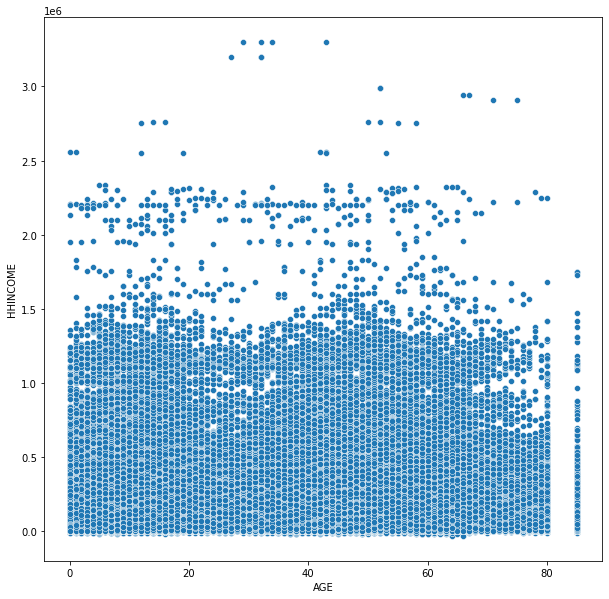

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(cps_cleaned["AGE"], cps_cleaned["HHINCOME"])

<AxesSubplot:xlabel='HHINCOME', ylabel='Count'>

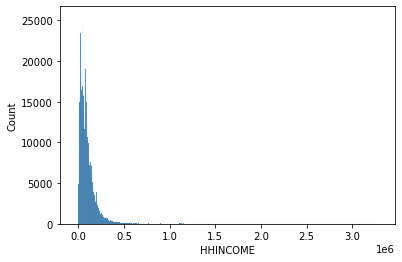

In [7]:
sns.histplot(data=cps_cleaned, x = "HHINCOME")

<AxesSubplot:xlabel='METRO', ylabel='Count'>

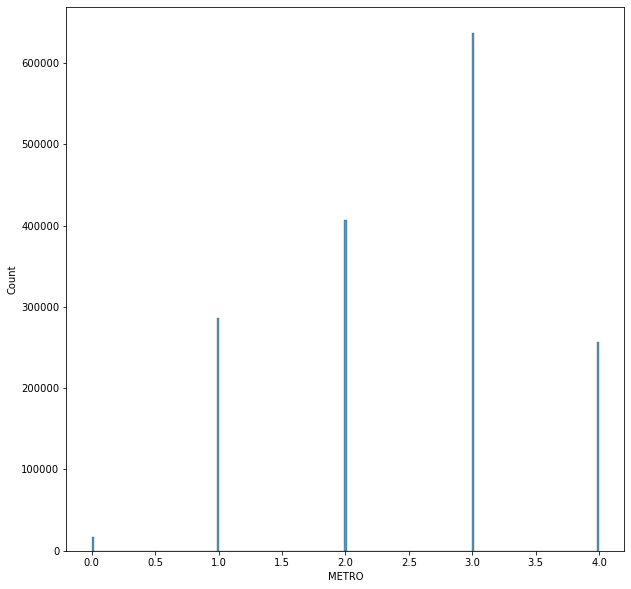

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=cps_cleaned, x = "METRO", ax=ax)

<AxesSubplot:xlabel='FAMINC', ylabel='Count'>

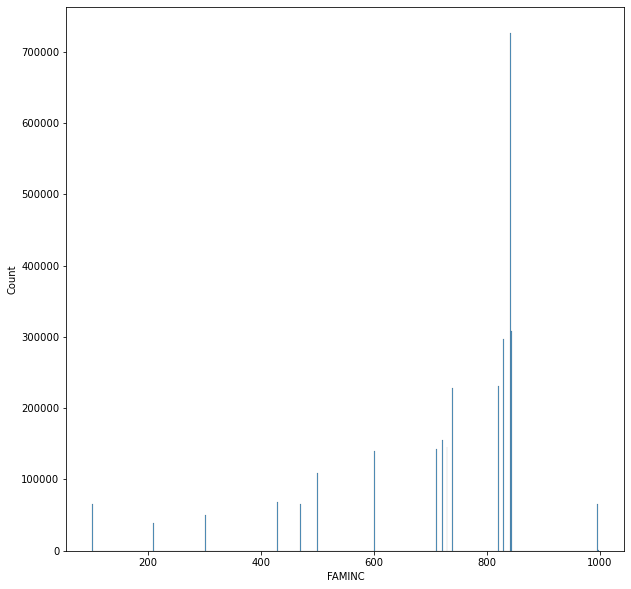

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=cps, x = "FAMINC", ax=ax)

In [20]:
cps.groupby(by=["YEAR"]).mean()['HHINCOME']

YEAR
2008     78738.218605
2009     79948.290543
2010     78773.508246
2011     78504.528854
2012     81394.901250
2013     83478.248655
2014     86273.351300
2015     88439.335869
2016     91193.815060
2017     96023.744672
2018     99332.370899
2019    103625.354629
2020    113706.667116
2021    112241.532728
2022    118626.829067
Name: HHINCOME, dtype: float64

In [5]:
main_cols = ["YEAR", "SERIAL", "CPSID", "HHINTYPE", "CPI99", "REGION", "METRO", "HHINCOME", "FAMINC", "CPSIDP", "AGE", "RACE","CLASSWKR", "UHRSWORKT", "EDUC", "WORKLY" ]

cps_filtered = cps_cleaned[main_cols]
cps_filtered

,YEAR,SERIAL,CPSID,HHINTYPE,CPI99,REGION,METRO,HHINCOME,FAMINC,CPSIDP,AGE,RACE,CLASSWKR,UHRSWORKT,EDUC,WORKLY
1233142,2014,1,20140102878600,1,0.715,11,1,207803,842,20140102878601,73,100,27,40,124,2
1233143,2014,1,20140102878600,1,0.715,11,1,207803,842,20140102878602,72,100,21,45,111,2
1233144,2014,1,20140102878600,1,0.715,11,1,207803,842,20140102878603,34,100,21,40,111,2
1233145,2014,1,20140102878600,1,0.715,11,1,207803,842,20140102878605,8,100,0,999,1,0
1233146,2014,1,20140102878600,1,0.715,11,1,207803,842,20140102878604,2,100,0,999,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837537,2022,89197,0,1,0.615,42,3,32300,730,0,49,651,21,40,73,2
2837538,2022,89197,0,1,0.615,42,3,32300,730,0,18,809,0,999,73,1
2837539,2022,89197,0,1,0.615,42,3,32300,730,0,11,809,0,999,1,0
2837540,2022,89197,0,1,0.615,42,3,32300,730,0,9,809,0,999,1,0


<AxesSubplot:>

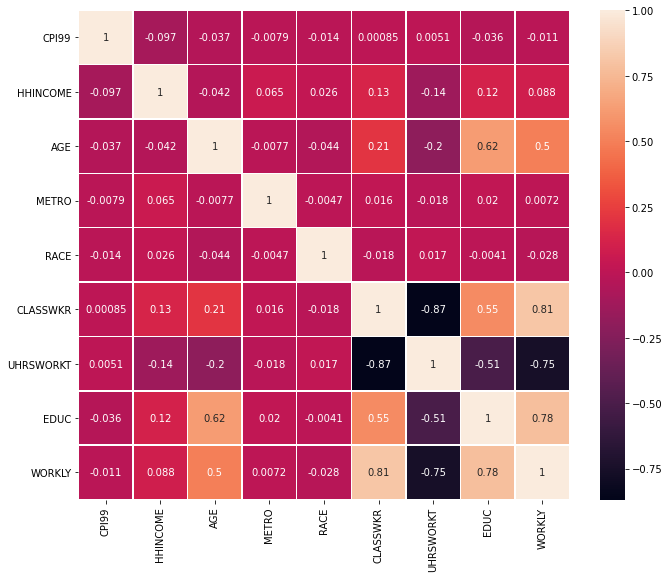

In [15]:
corr = cps_filtered[["CPI99", "HHINCOME", "AGE", "METRO", "RACE","CLASSWKR", "UHRSWORKT", "EDUC", "WORKLY"]].corr()

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

In [16]:
cps_filtered["RACE"].unique()

array([100, 200, 300, 802, 651, 810, 805, 803, 801, 804, 652, 806, 814,
       812, 811, 816, 808, 807, 813, 815, 809, 830, 817, 820, 818, 819],
      dtype=int64)

No need to clean this column because all are valid values. But need to be coded into one-hot encoding because race is not ordinal

In [17]:
cps_filtered["EDUC"].unique()

array([124, 111,   1,  81,  40,  73,  60,  50,  30, 123,  92,  91, 125,
        71,   2,  10,  20], dtype=int64)

In [18]:
cps_filtered["AGE"].unique()

array([73, 72, 34,  8,  2, 41, 16, 43, 67, 70, 66, 47, 55, 38, 39,  7, 10,
       17, 80, 37, 59, 85, 48, 46, 18, 11, 57, 26,  3,  0, 53, 58, 62, 12,
        4, 33, 42,  6, 45, 30, 19, 65, 32,  1, 50, 60, 29, 28,  5, 21, 35,
       13, 23, 25, 52, 31,  9, 64, 63, 61, 56, 44, 22, 75, 49, 78, 20, 14,
       36, 68, 71, 77, 15, 40, 27, 79, 51, 76, 69, 24, 54, 74],
      dtype=int64)

In [20]:
cps_filtered["HHINCOME"].describe()

count    1.604400e+06
mean     1.000823e+05
std      1.105378e+05
min     -3.194100e+04
25%      3.875950e+04
50%      7.440000e+04
75%      1.264100e+05
max      3.299997e+06
Name: HHINCOME, dtype: float64

In [21]:
cps_filtered["FAMINC"].unique()

array([842, 600, 820, 470, 210, 430, 843, 730, 100, 830, 740, 710, 720,
       300, 841, 500], dtype=int64)

In [8]:
cps_filtered["CLASSWKR"].unique()

array([27, 21,  0, 13, 14, 25, 26, 28, 29], dtype=int64)

Need to one-hot encode this

In [10]:
cps_filtered["WORKLY"].unique()

array([2, 0, 1], dtype=int64)

In [11]:
cps_processed = pd.get_dummies(cps_filtered, columns=['RACE', 'CLASSWKR'], drop_first=True)
cps_processed.columns

Index(['YEAR', 'SERIAL', 'CPSID', 'HHINTYPE', 'CPI99', 'REGION', 'METRO',
       'HHINCOME', 'FAMINC', 'CPSIDP', 'AGE', 'UHRSWORKT', 'EDUC', 'WORKLY',
       'RACE_200', 'RACE_300', 'RACE_651', 'RACE_652', 'RACE_801', 'RACE_802',
       'RACE_803', 'RACE_804', 'RACE_805', 'RACE_806', 'RACE_807', 'RACE_808',
       'RACE_809', 'RACE_810', 'RACE_811', 'RACE_812', 'RACE_813', 'RACE_814',
       'RACE_815', 'RACE_816', 'RACE_817', 'RACE_818', 'RACE_819', 'RACE_820',
       'RACE_830', 'CLASSWKR_13', 'CLASSWKR_14', 'CLASSWKR_21', 'CLASSWKR_25',
       'CLASSWKR_26', 'CLASSWKR_27', 'CLASSWKR_28', 'CLASSWKR_29'],
      dtype='object')

In [22]:
np.sort(cps_filtered["FAMINC"].unique())

array([100, 210, 300, 430, 470, 500, 600, 710, 720, 730, 740, 820, 830,
       841, 842, 843], dtype=int64)

In [25]:
faminc_codes = {}
for i, val in enumerate(np.sort(cps_filtered["FAMINC"].unique())):
    faminc_codes[val] = i

faminc_codes

{100: 0,
 210: 1,
 300: 2,
 430: 3,
 470: 4,
 500: 5,
 600: 6,
 710: 7,
 720: 8,
 730: 9,
 740: 10,
 820: 11,
 830: 12,
 841: 13,
 842: 14,
 843: 15}

In [27]:
cps_processed.replace({'FAMINC': faminc_codes}, inplace=True)

In [28]:
cps_processed.head()

,YEAR,SERIAL,CPSID,HHINTYPE,CPI99,REGION,METRO,HHINCOME,FAMINC,CPSIDP,...,RACE_820,RACE_830,CLASSWKR_13,CLASSWKR_14,CLASSWKR_21,CLASSWKR_25,CLASSWKR_26,CLASSWKR_27,CLASSWKR_28,CLASSWKR_29
1233142,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878601,...,0,0,0,0,0,0,0,1,0,0
1233143,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878602,...,0,0,0,0,1,0,0,0,0,0
1233144,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878603,...,0,0,0,0,1,0,0,0,0,0
1233145,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878605,...,0,0,0,0,0,0,0,0,0,0
1233146,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878604,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cps_processed.to_csv('../../data/cps_processed.csv')

In [18]:
cps_processed[cps_processed['CPSID'] == 20140102878600]["FAMINC"]

1233142    842
1233143    842
1233144    842
1233145    842
1233146    842
1432737    841
1432738    841
Name: FAMINC, dtype: int64

In [19]:
cps_processed['FAMINC']

1233142    842
1233143    842
1233144    842
1233145    842
1233146    842
          ... 
2837537    730
2837538    730
2837539    730
2837540    730
2837541    730
Name: FAMINC, Length: 1604400, dtype: int64

In [67]:
states = cps_processed["FAMINC"].unique()
sequences = cps_processed["CPSID"].unique()
matrix = np.zeros(shape=(states.size, states.size))

In [39]:
seq1 = cps_processed[cps_processed["CPSID"] == 20140102878600]
seq1

,YEAR,SERIAL,CPSID,HHINTYPE,CPI99,REGION,METRO,HHINCOME,FAMINC,CPSIDP,...,RACE_820,RACE_830,CLASSWKR_13,CLASSWKR_14,CLASSWKR_21,CLASSWKR_25,CLASSWKR_26,CLASSWKR_27,CLASSWKR_28,CLASSWKR_29
1233142,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878601,...,0,0,0,0,0,0,0,1,0,0
1233143,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878602,...,0,0,0,0,1,0,0,0,0,0
1233144,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878603,...,0,0,0,0,1,0,0,0,0,0
1233145,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878605,...,0,0,0,0,0,0,0,0,0,0
1233146,2014,1,20140102878600,1,0.715,11,1,207803,14,20140102878604,...,0,0,0,0,0,0,0,0,0,0
1432737,2015,23,20140102878600,1,0.704,11,1,149242,13,20140102878601,...,0,0,0,0,0,0,0,1,0,0
1432738,2015,23,20140102878600,1,0.704,11,1,149242,13,20140102878602,...,0,0,0,0,1,0,0,0,0,0


In [78]:
len(cps_processed["CPSIDP"].unique())

712240

In [68]:
len(sequences)

288369

In [69]:
sequences[:5]

array([20140102878600, 20131202917500, 20140302917500, 20131202838900,
       20140202927500], dtype=int64)

In [75]:
for s in sequences[:100]:
    seq = cps_processed[cps_processed["CPSID"] == s]
    target_col = np.argmax(seq.columns == "FAMINC")
    for i in range(0, len(seq)-1):
        j = i+1
        curr = seq.iloc[i, target_col]
        next = seq.iloc[j, target_col]
        if abs(curr - next) > 0:
            matrix[curr, next] = 1

In [76]:
matrix

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,